# Домашнее задание по теме «Функции потерь и оптимизация»

    Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/

    Реализовать самостоятельно логистическую регрессию
        Обучить ее методом градиентного спуска
        Методом nesterov momentum
        Методом rmsprop

    В качестве dataset’а взять Iris, оставив 2 класса:
        Iris Versicolor
        Iris Virginica

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plot

In [2]:
ds = datasets.load_iris()

In [3]:
ds.keys()

['target', 'DESCR', 'target_names', 'feature_names', 'data', 'filename']

In [4]:
ds['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [5]:
X = pd.DataFrame(ds['data'], columns=ds['feature_names'])
y = pd.DataFrame(ds['target'], columns=['class'])

In [6]:
X = X[y['class']>0].reset_index(drop=True)
y = y[y['class']>0]-1

In [7]:
pd.DataFrame(np.ones((X.shape[0],1))).shape

(100, 1)

Добавим столбец 1, что бы работать с матрицами

In [8]:
X = pd.concat((pd.DataFrame(np.ones((X.shape[0],1))),X), axis=1, ignore_index=True)

In [9]:
X.shape

(100, 5)

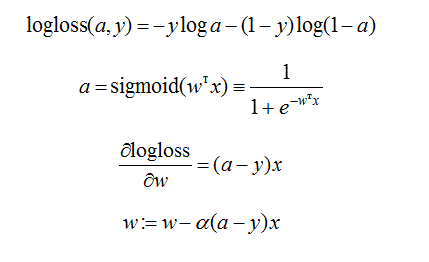

In [10]:
# функция вероятности принадлежности классу
def p(X,w):
    return 1/(1+np.exp(np.sum(-w*X.values,axis=1)))

In [11]:
# Кросс-энтропийная функция ошибок
def loss(X,y,w):
    return sum(-y.values*np.log(p(X,w))-(np.ones((X.shape[0]))-y.values)*np.log(1-p(X,w)))/len(y)

In [12]:
# градиент функции ошибок
def grad(X,y,w):
    return sum((p(X,w) - y.values).reshape((len(y),1)) * X.values)/len(y)

In [13]:
# градиентный спуск
def gradient_descent(X ,y ,w0 ,alpha ,ns):
    w = w0
    losses = []
    for n in range(0,ns):
        w = w - alpha*grad(X,y,w)
        #print (w , grad(X,y,w), loss(X,y,w))
        losses.append(loss(X,y,w))
    return w, losses

In [14]:
w0=np.array([-1,-1,-1,1,1])

y_pred = p(X,w0)


In [15]:
# запустим градиентный спус, выведем коэффициенты
w , losses = gradient_descent(X, y['class'], w0, 0.03, 1000)
print w

[-1.43584256 -1.56833439 -1.49988189  2.41470428  2.27235876]


In [16]:
# выведем коэффициенты, полученные из sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
print(lr.coef_)

[[-1.08923189 -1.58837093 -1.44464566  2.46958974  2.53050957]]


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
T = 0.5
y_pred = [p(X,w)>T]
y_pred

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])]

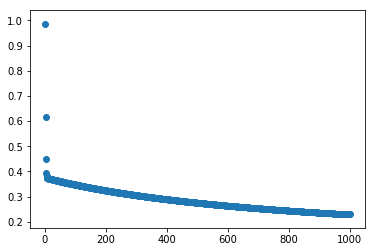

In [18]:
# график сходимости ошибок
plot.scatter(np.linspace(1,len(losses),len(losses)),losses)

# Nesterov Accelerated Gradient

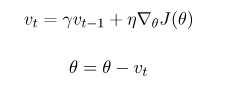

In [19]:
def nesterov_gradient_descent(X ,y ,w0 ,alpha ,l ,ns):
    w = w0
    u0 = 0
    losses = []
    for n in range(0,ns):
        u = l*u0 + alpha*grad(X,y,w)
        w = w - u
        u0 = u
        #print (w , grad(X,y,w), loss(X,y,w))
        losses.append(loss(X,y,w))
    return w, losses

In [20]:
w , losses2 = nesterov_gradient_descent(X, y['class'], w0, 0.03 ,0.4, 1000)
print w

[-1.66178738 -1.8917583  -1.77091532  2.86162005  2.76711504]


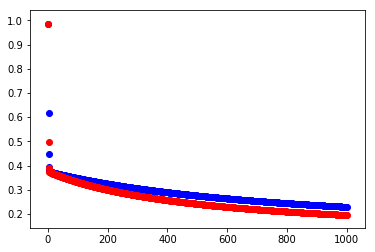

In [21]:
plot.scatter(np.linspace(1,len(losses),len(losses)),losses, c='blue')
plot.scatter(np.linspace(1,len(losses),len(losses)),losses2, c='red')

# RMSProp

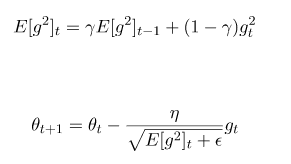

In [22]:
def RMSProp_gradient_descent(X ,y ,w0 ,alpha ,l ,ns):
    w = w0
    E0 = 0
    e = 1e-10
    losses = []
    for n in range(0,ns):
        E = l*E0 + (1-l)*(grad(X,y,w)**2)
        w = w - alpha / np.sqrt(E + e) * grad(X,y,w)
        E0 = E
        #print (w , grad(X,y,w), loss(X,y,w))
        losses.append(loss(X,y,w))
    return w, losses

In [23]:
w , losses3 = RMSProp_gradient_descent(X, y['class'], w0, 0.03 ,0.4, 1000)
print w

[-6.61370264 -2.15876209 -3.19338822  3.5939084   6.86406391]


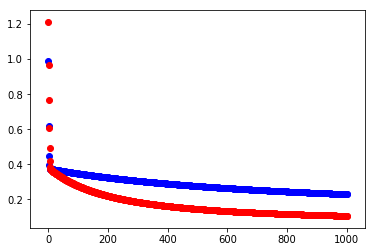

In [24]:
plot.scatter(np.linspace(1,len(losses),len(losses)),losses, c='blue')
plot.scatter(np.linspace(1,len(losses),len(losses)),losses3, c='red')